✅ Dataset Loaded Successfully!
Shape: (100, 11)


,id,patient_id,session_id,actual_label,predicted_label,A_phys,A_cog,A_mental,TPS,difficulty_prev,difficulty_new
0,1,P05,S07,Correct,Correct,91.1,64.5,67.0,75.89,0.88,0.88
1,2,P15,S10,Correct,Correct,77.9,76.9,71.7,75.74,1.21,1.21
2,3,P11,S06,Correct,Correct,77.0,80.5,89.4,81.77,0.94,0.94
3,4,P07,S04,Correct,Correct,80.5,72.8,69.0,74.74,1.09,1.08
4,5,P12,S06,Correct,Correct,79.6,85.0,84.3,82.63,0.93,0.93



📊 Confusion Matrix:


,Predicted Correct,Predicted Incorrect
Actual Correct,85,5
Actual Incorrect,4,6



📈 Model Performance Metrics:
Accuracy : 91.00%
Precision: 95.51%
Recall   : 94.44%
F1-Score : 94.97%


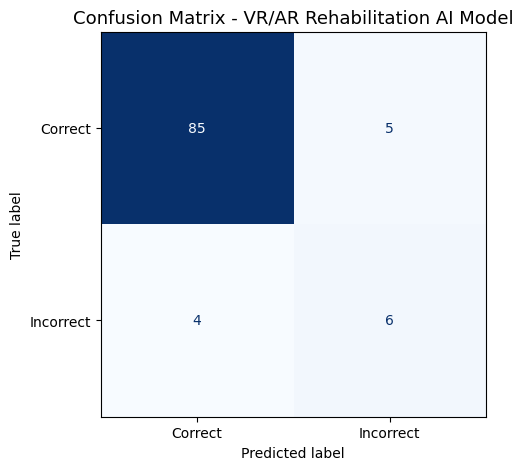


📊 TPS & Difficulty Summary:


,A_phys,A_cog,A_mental,TPS,difficulty_prev,difficulty_new
count,100.000000,100.00000,100.000000,100.000000,100.000000,100.000000
mean,77.286000,72.26700,71.222000,73.961100,1.129200,1.123500
std,10.671864,10.24637,12.433659,7.010788,0.205184,0.205428
min,60.100000,55.20000,50.100000,58.180000,0.800000,0.800000
25%,67.975000,62.40000,59.175000,68.470000,0.940000,0.937500
50%,78.000000,73.45000,70.600000,73.895000,1.120000,1.110000
75%,86.675000,81.02500,82.775000,78.557500,1.310000,1.300000
max,94.500000,89.60000,89.600000,90.580000,1.500000,1.490000


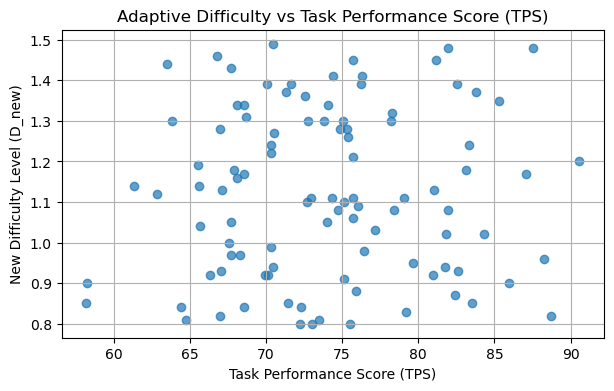

In [1]:
# ======================================================

# AI-Driven VR/AR Rehabilitation - Model Evaluation

# Confusion Matrix & Performance Metrics

# ======================================================



# Import required libraries

import pandas as pd

import numpy as np

import matplotlib.pyplot as plt

from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, ConfusionMatrixDisplay



# ------------------------------------------------------

# 1. Load Dataset

# ------------------------------------------------------

# Replace the path with your dataset location if needed

df = pd.read_csv("rehab_dataset.csv")



print(" Dataset Loaded Successfully!")

print("Shape:", df.shape)

display(df.head())



# ------------------------------------------------------

# 2. Extract Ground Truth & Predictions

# ------------------------------------------------------

y_true = df["actual_label"]

y_pred = df["predicted_label"]



# ------------------------------------------------------

# 3. Generate Confusion Matrix

# ------------------------------------------------------

labels = ["Correct", "Incorrect"]

cm = confusion_matrix(y_true, y_pred, labels=labels)



# Display Confusion Matrix values

cm_df = pd.DataFrame(cm, index=[f"Actual {l}" for l in labels],

                        columns=[f"Predicted {l}" for l in labels])

print("\n Confusion Matrix:")

display(cm_df)



# ------------------------------------------------------

# 4. Compute Performance Metrics

# ------------------------------------------------------

accuracy = accuracy_score(y_true, y_pred)

precision = precision_score(y_true, y_pred, pos_label="Correct")

recall = recall_score(y_true, y_pred, pos_label="Correct")

f1 = f1_score(y_true, y_pred, pos_label="Correct")



print("\n Model Performance Metrics:")

print(f"Accuracy : {accuracy*100:.2f}%")

print(f"Precision: {precision*100:.2f}%")

print(f"Recall   : {recall*100:.2f}%")

print(f"F1-Score : {f1*100:.2f}%")



# ------------------------------------------------------

# 5. Visualize Confusion Matrix

# ------------------------------------------------------

fig, ax = plt.subplots(figsize=(6, 5))

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)

disp.plot(cmap="Blues", ax=ax, colorbar=False)

plt.title("Confusion Matrix - VR/AR Rehabilitation AI Model", fontsize=13)

plt.show()



# ------------------------------------------------------

# 6. Optional: Summary Statistics for TPS & Difficulty

# ------------------------------------------------------

print("\n TPS & Difficulty Summary:")

summary_stats = df[["A_phys", "A_cog", "A_mental", "TPS", "difficulty_prev", "difficulty_new"]].describe()

display(summary_stats)



# ------------------------------------------------------

# 7. Optional: Relationship Plot

# ------------------------------------------------------

plt.figure(figsize=(7, 4))

plt.scatter(df["TPS"], df["difficulty_new"], alpha=0.7)

plt.title("Adaptive Difficulty vs Task Performance Score (TPS)")

plt.xlabel("Task Performance Score (TPS)")

plt.ylabel("New Difficulty Level (D_new)")

plt.grid(True)

plt.show()